# Ejercicios de Numpy y Pandas

Primero obtengamos data con que trabajar

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def generate_time_series(batch_size, n_steps):
    """
    Generate a time series of length n_steps
    batch_size: number of examples to generate
    n_steps: length of time series
    """

    freq1, freq2, offsets1, offsets2 = np.random.rand(4)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(n_steps) - 0.5)   # + noise
    return series.astype(np.float32)


In [3]:
np.random.seed(42)

n_steps = 50
series = generate_time_series(1, n_steps)
print( series.shape )
print( type(series) )

(50,)
<class 'numpy.ndarray'>


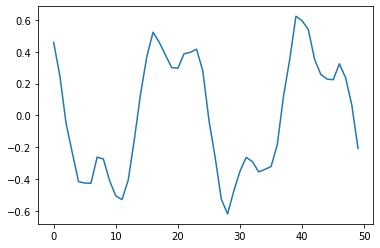

In [4]:
plt.plot(series)
plt.show()

Ahora que tenemos el numpy array "serie", calcule los siguientes valores usando numpy:

* El promedio y desviación estandar
* La mediana
* Percentiles 25, 50, 75
* Máximo y mínimo
* Índices donde se encuentran el máximo y mínimo

In [6]:
np.std(series)

0.3666793

In [7]:
np.median(series)

0.016709557

In [10]:
np.percentile(series, 0.75)

-0.5871907956898212

In [11]:
pd.Series(series).describe()

count    50.000000
mean      0.004527
std       0.370402
min      -0.620364
25%      -0.335764
50%       0.016710
75%       0.343904
max       0.623384
dtype: float64

Usando pandas, convierta el array "serie" a un pandas DataFrame o Series, y trate de graficarlo usando pandas

In [32]:
pd.Series(series)

0     0.458687
1     0.247719
2    -0.051436
3    -0.235851
4    -0.416960
5    -0.426108
6    -0.427281
7    -0.263075
8    -0.274899
9    -0.411060
10   -0.506898
11   -0.530097
12   -0.408716
13   -0.148179
14    0.137273
15    0.370111
16    0.522905
17    0.459210
18    0.378965
19    0.300388
20    0.296188
21    0.387853
22    0.396090
23    0.416133
24    0.281198
25   -0.030893
26   -0.265256
27   -0.528922
28   -0.620364
29   -0.476412
30   -0.350906
31   -0.264608
32   -0.291353
33   -0.356244
34   -0.340201
35   -0.322452
36   -0.184882
37    0.119938
38    0.350642
39    0.623384
40    0.594753
41    0.539158
42    0.353007
43    0.257817
44    0.228366
45    0.223816
46    0.323693
47    0.236391
48    0.064312
49   -0.208575
dtype: float32

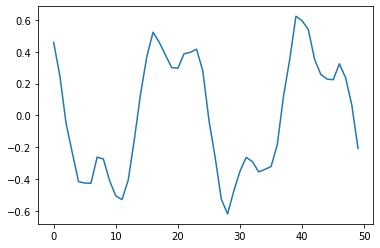

In [12]:
pd.Series(series).plot()

## Ejemplo con Titanic dataset

Veamos un ejemplo trabajando con un dataframe

In [13]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Ahora responda a las siguientes preguntas usando funciones de pandas

In [17]:
# ¿Cuántas personas sobrevivieron? ¿Qué porcentaje son del total?

titanic[titanic['survived'] == 1].count().max()


342

In [24]:
titanic['embark_town'].nunique()

3

In [25]:
# ¿Cuántos hombres y mujeres hay en el dataset?

titanic['sex'].value_counts()


male      577
female    314
Name: sex, dtype: int64

In [26]:
# ¿Cuál es la edad promedio? ¿edad promedio por género? ¿edad promedio de la gente que sobrevivió?
# Hint: use la función "groupby"

titanic['age'].mean()


29.69911764705882

In [28]:
titanic.groupby('survived')['age'].mean()


survived
0    30.626179
1    28.343690
Name: age, dtype: float64

In [29]:
# Calcule el fare promedio por clase

titanic.groupby('class')['fare'].mean()


class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [30]:
# ¿Cuál es la clase mayoritaria de la gente que sobrevivió?
titanic.groupby('class')['survived'].value_counts()


class   survived
First   1           136
        0            80
Second  0            97
        1            87
Third   0           372
        1           119
Name: survived, dtype: int64